In [250]:
from pathlib import Path
from src.main import run_generation
import importlib
from src.config import Config, PROJECT_ROOT
from src.main import run_generation, get_attentions_for_prompt
import os
from pathlib import Path

#########actualize config, doesnt work fine. Take care for new model sizes when inferencing!
import importlib
import src.config
import src.main
import src.training.utils
from src.model import transformer

import src.tokenizer


importlib.reload(src.config)
importlib.reload(src.model.transformer)
importlib.reload(src.tokenizer)
importlib.reload(src.training.utils)
importlib.reload(src.main)

from src.config import Config, PROJECT_ROOT
from src.main import run_generation
######################################################



# Drei verschiedene Checkpoints – aktuell alle gleich,
# du kannst sie später durch echte ersetzen
CHECKPOINTS = [
  #  PROJECT_ROOT / "checkpoints" / "best_epoch1_val2.0773.pt",
   #  PROJECT_ROOT / "checkpoints" / "best_epoch3_val2.4214.pt",
  #   PROJECT_ROOT / "checkpoints" / "best_epoch2_val1.1781.pt",
   #  PROJECT_ROOT / "checkpoints" / "best_epoch1_val1.3486.pt",
   #  PROJECT_ROOT / "checkpoints" / "best_epoch1_val1.3826.pt",
   #  PROJECT_ROOT / "checkpoints" / "best_epoch2_val1.3629.pt",
   #  PROJECT_ROOT / "checkpoints" / "best_epoch3_val1.3585.pt",
    # PROJECT_ROOT / "checkpoints" / "best_epoch5_val1.3495.pt",
    PROJECT_ROOT / "checkpoints" / "best_epoch1_val1.3473.pt",
]

cfg = Config()

print("Device:", cfg.device.get_device())
print("PROJECT_ROOT:", PROJECT_ROOT)
# Quick check
for cp in CHECKPOINTS:
    print(cp, "exists:", cp.exists())


print("CWD:", os.getcwd())
print("Inhalt hier:", os.listdir("."))


Device: cuda
PROJECT_ROOT: /home/daniel/PycharmProjects/mini_transformer
/home/daniel/PycharmProjects/mini_transformer/checkpoints/best_epoch1_val1.3473.pt exists: True
CWD: /home/daniel/PycharmProjects/mini_transformer/notebooks
Inhalt hier: ['01_inference_and_attention.ipynb']


In [244]:

### NO NEED TO START THIS, USE FUNCTION BELOW

def run_generation_for_checkpoint(prompt: str, checkpoint_path: Path):
    print("\n" + "="*60)
    print(f"CHECKPOINT: {checkpoint_path.name}")
    print("="*60)

    run_generation(
        cfg=cfg,
        checkpoint_path=str(checkpoint_path),
        prompt=prompt,
        max_new_tokens=200,
        temperature=1.3,
        max_vocab_size=256,
    )


In [260]:
### USE THIS FUNCTION TO START INFERNCE WITH DIFFERENT EXAMPLES
prompt = "give colors like red"

for cp in CHECKPOINTS:
    run_generation_for_checkpoint(prompt, cp)



CHECKPOINT: best_epoch1_val1.3473.pt
[device] Verwende Device für Inferenz: cuda
[gen] Lade Checkpoint: /home/daniel/PycharmProjects/mini_transformer/checkpoints/best_epoch1_val1.3473.pt
[gen] Vokabulargröße: 50
[checkpoint] Geladen von: /home/daniel/PycharmProjects/mini_transformer/checkpoints/best_epoch1_val1.3473.pt
[gen] Checkpoint-Epoche: 1, best_val_loss: 1.3473431127459248
[gen] Prompt: 'give colors like red'
[gen] Input-IDs-Länge: 22
===========================[ GENERIERTER TEXT ]===========================
defenceasafe; bankin geoffrey of nut-fame? but tad
deaden; dain-devil; egul, 855th., 1415 , my guiy jacdet gin-scampfelt in
the d


In [233]:
import matplotlib.pyplot as plt
import numpy as np


CHECKPOINT_PATH = PROJECT_ROOT / "checkpoints" / "best_epoch1_val2.0773.pt"
tokens, attentions = get_attentions_for_prompt(
    cfg=cfg,
    checkpoint_path=str(CHECKPOINT_PATH),
    prompt="what can I do with Alice",
    max_vocab_size=256,
)


[device] Verwende Device für Inferenz: cuda
[gen] Lade Checkpoint: /home/daniel/PycharmProjects/mini_transformer/checkpoints/best_epoch1_val2.0773.pt
[gen] Vokabulargröße: 50
[checkpoint] Geladen von: /home/daniel/PycharmProjects/mini_transformer/checkpoints/best_epoch1_val2.0773.pt
[gen] Checkpoint-Epoche: 1, best_val_loss: 2.077255763834523
[attn] Prompt: 'what can I do with Alice'
[attn] Input-IDs-Länge: 26
[attn] Anzahl Layer: 4
[attn] Layer 0: Shape = torch.Size([1, 4, 26, 26])
[attn] Layer 1: Shape = torch.Size([1, 4, 26, 26])
[attn] Layer 2: Shape = torch.Size([1, 4, 26, 26])
[attn] Layer 3: Shape = torch.Size([1, 4, 26, 26])


In [234]:
# Wir nehmen: letzten Layer, Head 0
last_layer_idx = len(attentions) - 1
head_idx = 0

attn_layer = attentions[last_layer_idx]        # Shape: (B, H, T, T)
attn_head = attn_layer[0, head_idx]           # Shape: (T, T)

attn_np = attn_head.detach().cpu().numpy()
T = attn_np.shape[0]

print("Layer-Index:", last_layer_idx)
print("Head-Index:", head_idx)
print("Shape:", attn_np.shape)


Layer-Index: 3
Head-Index: 0
Shape: (26, 26)


In [163]:
# Tokens etwas "lesbarer" machen
display_tokens = []
for tok in tokens:
    if tok == "":
        display_tokens.append("<S>")  # z.B. Start/Ende
    elif tok == " ":
        display_tokens.append("<sp>") # Leerzeichen
    else:
        display_tokens.append(tok)

display_tokens[:20]


['<S>',
 'w',
 'h',
 'a',
 't',
 '<sp>',
 'c',
 'a',
 'n',
 '<sp>',
 '<S>',
 '<sp>',
 'd',
 'o',
 '<sp>',
 'w',
 'i',
 't',
 'h',
 '<sp>']

In [164]:
# Tokens lesbarer machen (wie bei der Heatmap)
display_tokens = []
for tok in tokens:
    if tok == "":
        display_tokens.append("<S>")  # z.B. Start/Ende
    elif tok == " ":
        display_tokens.append("<sp>") # Leerzeichen
    else:
        display_tokens.append(tok)

display_tokens


['<S>',
 'w',
 'h',
 'a',
 't',
 '<sp>',
 'c',
 'a',
 'n',
 '<sp>',
 '<S>',
 '<sp>',
 'd',
 'o',
 '<sp>',
 'w',
 'i',
 't',
 'h',
 '<sp>',
 '<S>',
 'l',
 'i',
 'c',
 'e',
 '<S>']

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Wir nehmen wieder: letzten Layer
last_layer_idx = len(attentions) - 1
head_idx = 0  # erstmal Head 0

attn_layer = attentions[last_layer_idx]      # Shape: (B, H, T, T)
attn_heads = attn_layer[0]                  # Shape: (H, T, T)
attn_head = attn_heads[head_idx]            # Shape: (T, T)

T = attn_head.shape[0]

# Letzte Zeile = Attention des letzten Tokens auf alle vorherigen
attn_last_token = attn_head[-1]             # Shape: (T,)

attn_last_token_np = attn_last_token.detach().cpu().numpy()

print("Shape letzte Zeile:", attn_last_token_np.shape)
print("Summe (sollte ~1 sein):", attn_last_token_np.sum())


Shape letzte Zeile: (26,)
Summe (sollte ~1 sein): 1.0


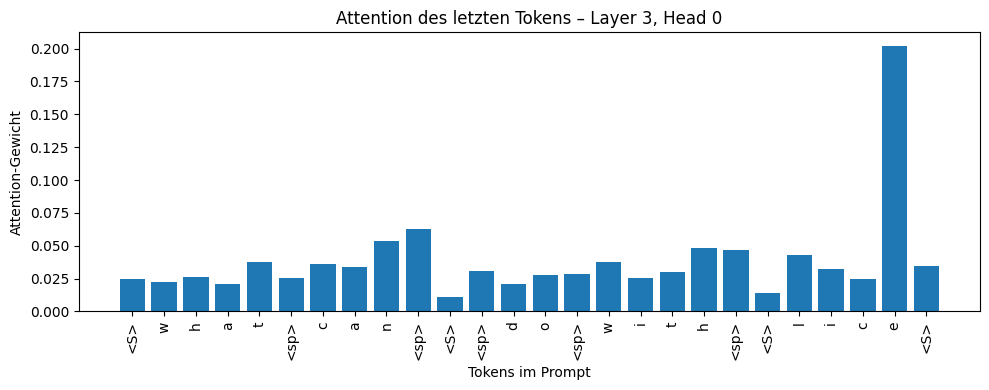

In [167]:
x = np.arange(T)

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(x, attn_last_token_np)

ax.set_xticks(x)
ax.set_xticklabels(display_tokens, rotation=90)

ax.set_ylabel("Attention-Gewicht")
ax.set_xlabel("Tokens im Prompt")
ax.set_title(f"Attention des letzten Tokens – Layer {last_layer_idx}, Head {head_idx}")

plt.tight_layout()
plt.show()

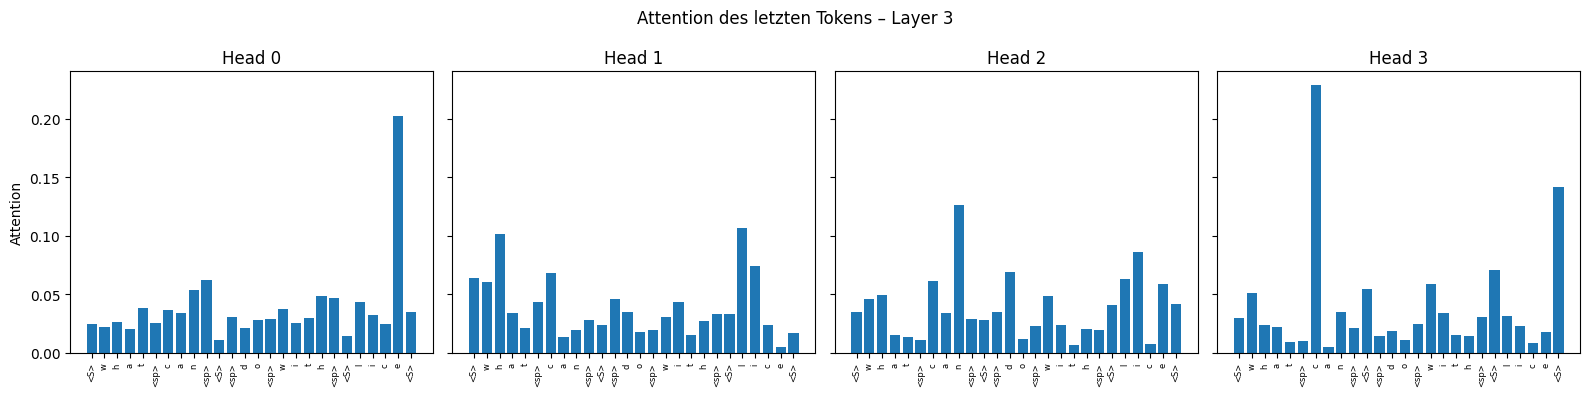

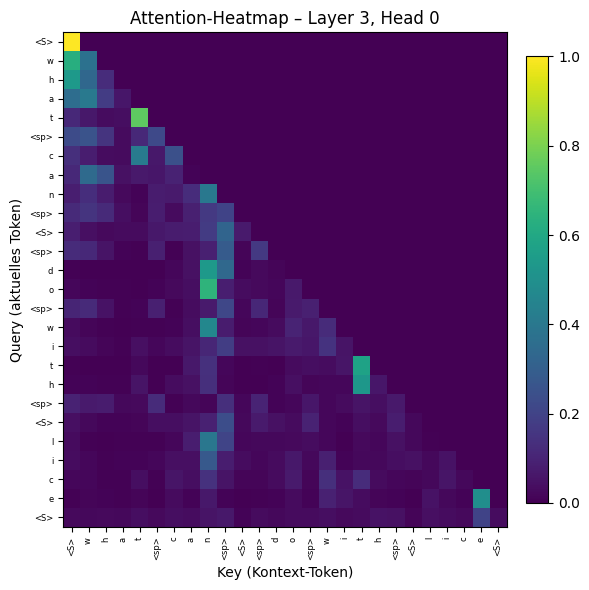

In [168]:
H = attn_heads.shape[0]

fig, axes = plt.subplots(1, H, figsize=(4*H, 4), sharey=True)

for h in range(H):
    attn_head_h = attn_heads[h]          # (T, T)
    attn_last_h = attn_head_h[-1]        # (T,)
    attn_last_h_np = attn_last_h.detach().cpu().numpy()

    ax = axes[h]
    ax.bar(x, attn_last_h_np)
    ax.set_xticks(x)
    ax.set_xticklabels(display_tokens, rotation=90, fontsize=6)
    ax.set_title(f"Head {h}")
    if h == 0:
        ax.set_ylabel("Attention")

plt.suptitle(f"Attention des letzten Tokens – Layer {last_layer_idx}")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))

im = ax.imshow(attn_np, aspect="auto")  # T x T

# Achsen-Beschriftungen
ax.set_xlabel("Key (Kontext-Token)")
ax.set_ylabel("Query (aktuelles Token)")

ax.set_xticks(range(T))
ax.set_yticks(range(T))

ax.set_xticklabels(display_tokens, rotation=90, fontsize=6)
ax.set_yticklabels(display_tokens, fontsize=6)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.set_title(f"Attention-Heatmap – Layer {last_layer_idx}, Head {head_idx}")

plt.tight_layout()
plt.show()